In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import proplot as pplt
import seaborn as sns
from tqdm import trange

In [2]:
pplt.rc['cmap.discrete'] = False
pplt.rc['cmap.sequential'] = 'viridis'
pplt.rc['figure.facecolor'] = 'white'
pplt.rc['grid'] = False

In [3]:
dmus = np.array([
    [0.0, 0.0],
    [0.0, -25.0],
    [0.0, -45.0],
    [25.0, -45.0],
    [45.0, -45.0],
    [25.0, -25.0],
])

In [23]:
phase_devs_x = np.degrees(np.loadtxt('_output/data/phase_devs_x.dat'))
phase_devs_y = np.degrees(np.loadtxt('_output/data/phase_devs_y.dat'))
condition_numbers = np.loadtxt('_output/data/condition_numbers.dat')
condition_numbers_xx = np.loadtxt('_output/data/condition_numbers_xx.dat')
condition_numbers_yy = np.loadtxt('_output/data/condition_numbers_yy.dat')
condition_numbers_xy = np.loadtxt('_output/data/condition_numbers_xy.dat')
condition_numbers_sum = condition_numbers_xx + condition_numbers_yy + condition_numbers_xy
condition_numbers_prod = condition_numbers_xx * condition_numbers_yy * condition_numbers_xy
fail_rates = np.loadtxt('_output/data/fail_rates.dat')
eps_x_means = 1e6 * np.loadtxt('_output/data/eps_x_means.dat')
eps_y_means = 1e6 * np.loadtxt('_output/data/eps_y_means.dat')
eps_1_means = 1e6 * np.loadtxt('_output/data/eps_1_means.dat')
eps_2_means = 1e6 * np.loadtxt('_output/data/eps_2_means.dat')
eps_x_stds = 1e6 * np.loadtxt('_output/data/eps_x_stds.dat')
eps_y_stds = 1e6 * np.loadtxt('_output/data/eps_y_stds.dat')
eps_1_stds = 1e6 * np.loadtxt('_output/data/eps_1_stds.dat')
eps_2_stds = 1e6 * np.loadtxt('_output/data/eps_2_stds.dat')

In [38]:
total_fail_idx = np.where(fail_rates >= 0.99)
total_fail_idx

(array([ 2,  3,  8, 11, 19]), array([ 9, 10, 13, 14, 15]))

In [39]:
arrays = [eps_x_means, eps_y_means, eps_1_means, eps_2_means,
          eps_x_stds, eps_y_stds, eps_1_stds, eps_2_stds]
for i in range(len(arrays)):
    arrays[i][total_fail_idx] = None

In [40]:
eps_x_true = eps_1_true = 20.1
eps_y_true = eps_2_true = 20.0
eps_x_errs = eps_x_means - eps_x_true
eps_y_errs = eps_y_means - eps_y_true
eps_1_errs = eps_1_means - eps_1_true
eps_2_errs = eps_2_means - eps_2_true

In [41]:
plot_kws = dict(ec='None', colorbar=True)

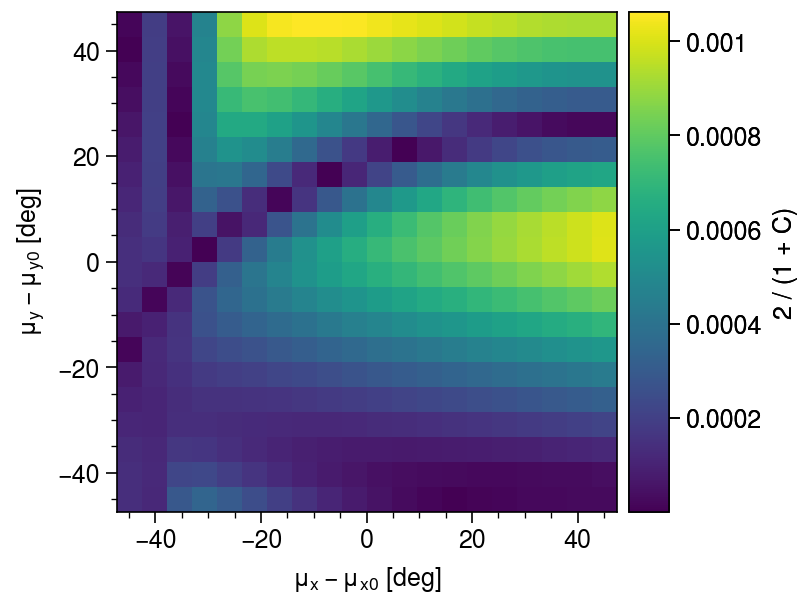

In [42]:
fig, ax = pplt.subplots()
Z = 2.0 / (1.0 + condition_numbers)
ax.pcolormesh(phase_devs_x, phase_devs_y, Z.T, 
              colorbar_kw=dict(label=r'2 / (1 + C)'),
              **plot_kws
             )
ax.format(xlabel=r'$\mu_x - \mu_{x0}$ [deg]', ylabel=r'$\mu_y - \mu_{y0}$ [deg]')
plt.savefig('_output/figures/inv_condition_numbers.png', facecolor='white', dpi=300)
plt.show()

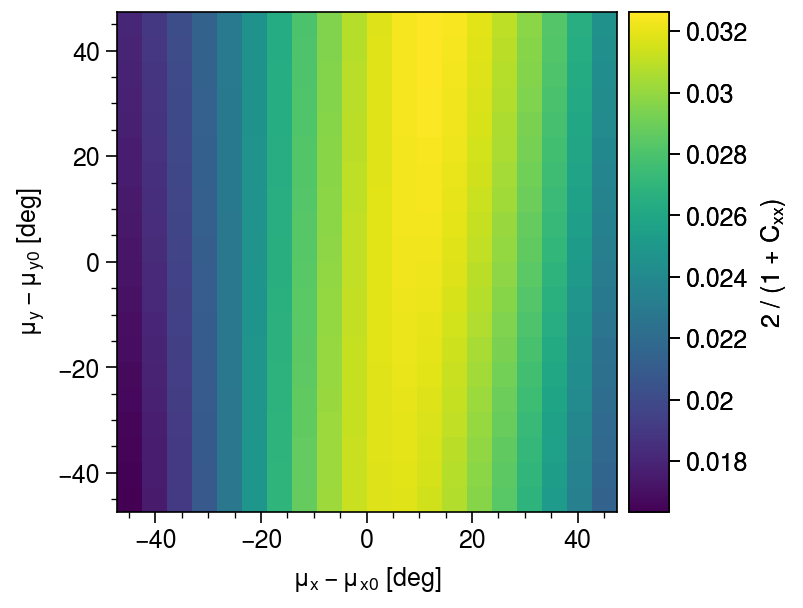

In [43]:
fig, ax = pplt.subplots()
Z = 2.0 / (1.0 + condition_numbers_xx)
ax.pcolormesh(phase_devs_x, phase_devs_y, Z.T, 
              colorbar_kw=dict(label=r'2 / (1 + $C_{xx}$)'),
              **plot_kws
             )
ax.format(xlabel=r'$\mu_x - \mu_{x0}$ [deg]', ylabel=r'$\mu_y - \mu_{y0}$ [deg]')
plt.savefig('_output/figures/inv_condition_numbers_xx.png', facecolor='white', dpi=300)
plt.show()

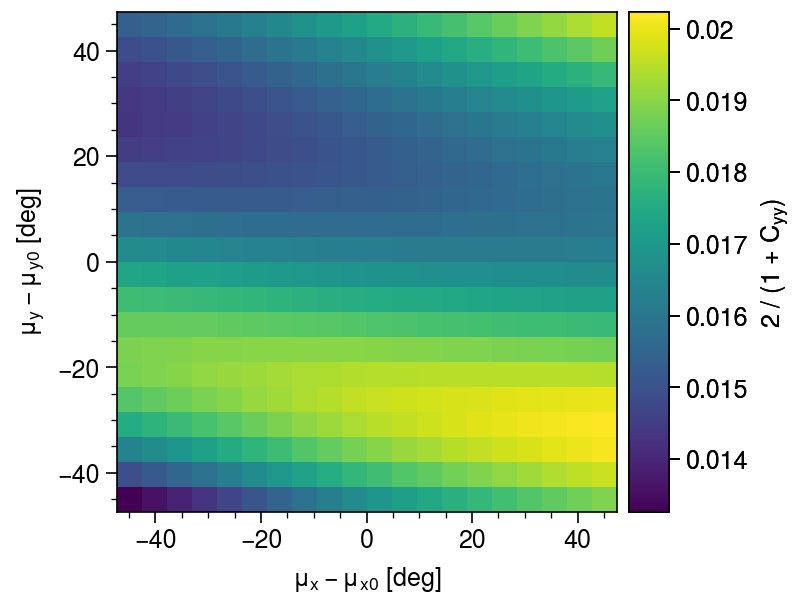

In [44]:
fig, ax = pplt.subplots()
Z = 2.0 / (1.0 + condition_numbers_yy)
ax.pcolormesh(phase_devs_x, phase_devs_y, Z.T, 
              colorbar_kw=dict(label=r'2 / (1 + $C_{yy}$)'),
              **plot_kws)
ax.format(xlabel=r'$\mu_x - \mu_{x0}$ [deg]', ylabel=r'$\mu_y - \mu_{y0}$ [deg]')
plt.savefig('_output/figures/inv_condition_numbers_yy.png', facecolor='white', dpi=300)
plt.show()

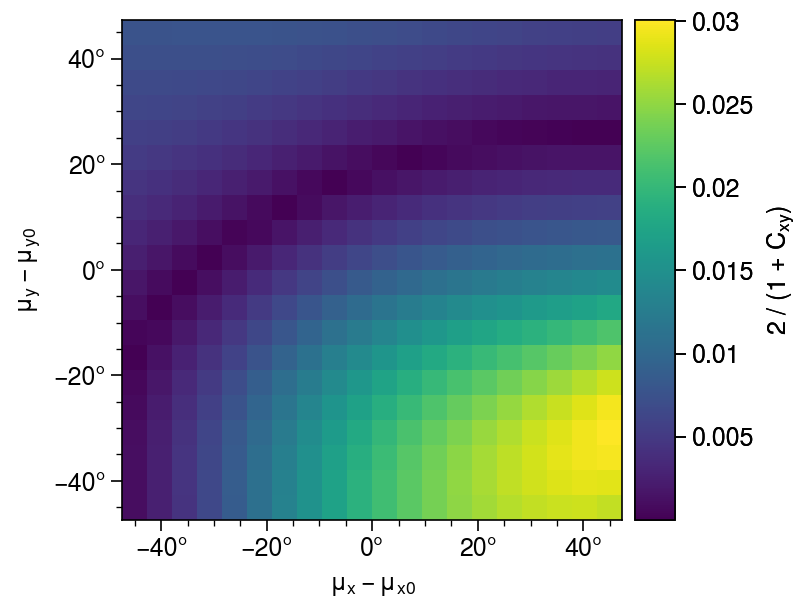

In [45]:
fig, ax = pplt.subplots()
Z = 2.0 / (1.0 + condition_numbers_xy)
ax.pcolormesh(phase_devs_x, phase_devs_y, Z.T,
              cmap='viridis',
              colorbar_kw=dict(label=r'2 / (1 + $C_{xy}$)'),
              **plot_kws)
ax.format(xlabel=r'$\mu_x - \mu_{x0}$', ylabel=r'$\mu_y - \mu_{y0}$',
          xformatter='deg', yformatter='deg')
plt.savefig('_output/figures/inv_condition_numbers_xy.png', facecolor='white', dpi=300)
plt.show()

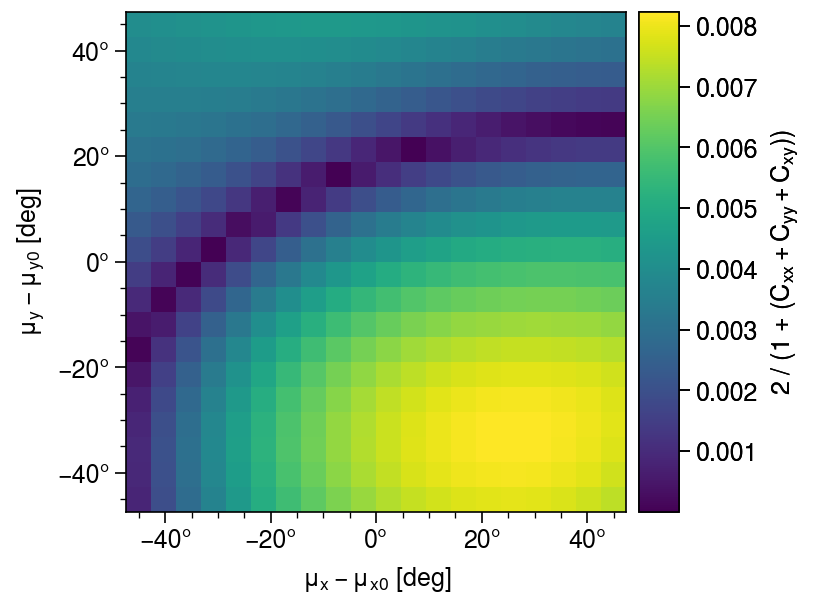

In [46]:
fig, ax = pplt.subplots()
Z = 2.0 / (1.0 + condition_numbers_sum)
ax.pcolormesh(phase_devs_x, phase_devs_y, Z.T, cmap='viridis',
              colorbar_kw=dict(label=r'2 / (1 + ($C_{xx} + C_{yy} + C_{xy}$))'),
              **plot_kws
             )
ax.format(xlabel=r'$\mu_x - \mu_{x0}$ [deg]', ylabel=r'$\mu_y - \mu_{y0}$ [deg]',
          xformatter='deg', yformatter='deg')
plt.savefig('_output/figures/inv_condition_numbers_sum.png', facecolor='white', dpi=300)
plt.show()

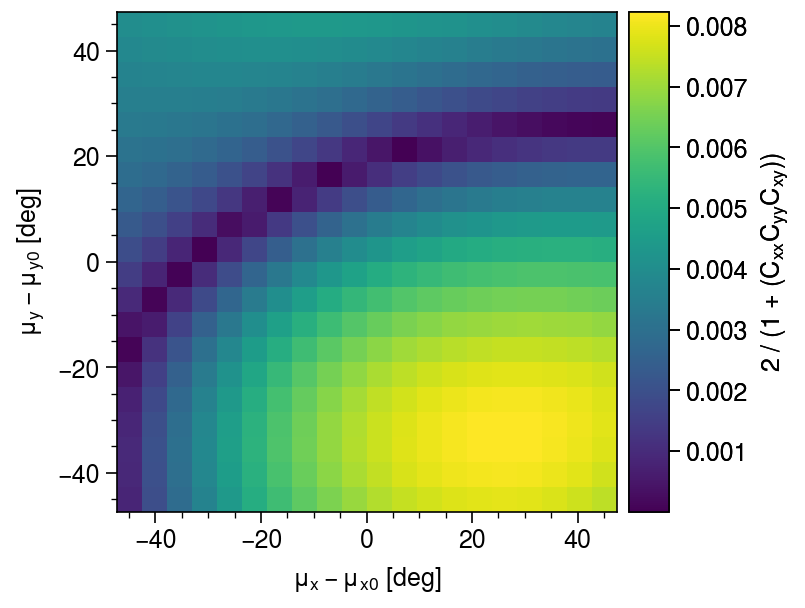

In [142]:
fig, ax = pplt.subplots()
Z = 2.0 / (1.0 + condition_numbers_sum)
ax.pcolormesh(phase_devs_x, phase_devs_y, Z.T,
              colorbar_kw=dict(label=r'2 / (1 + ($C_{xx} C_{yy} C_{xy}$))'),
              **plot_kws)
ax.format(xlabel=r'$\mu_x - \mu_{x0}$ [deg]', ylabel=r'$\mu_y - \mu_{y0}$ [deg]')
plt.savefig('_output/figures/inv_condition_numbers_prod.png', facecolor='white', dpi=300)
plt.show()

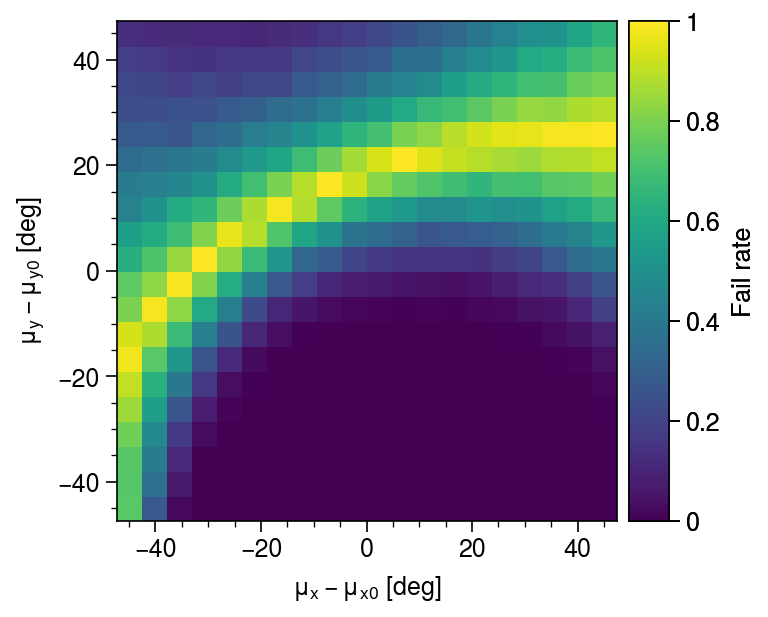

In [48]:
fig, ax = pplt.subplots()
ax.pcolormesh(phase_devs_x, phase_devs_y, fail_rates.T, 
              vmin=0, vmax=1,
              colorbar=True, colorbar_kw=dict(label='Fail rate'))
ax.format(xlabel=r'$\mu_x - \mu_{x0}$ [deg]', ylabel=r'$\mu_y - \mu_{y0}$ [deg]')
plt.savefig('_output/figures//fail_rates.png', dpi=300, facecolor='white')
plt.show()

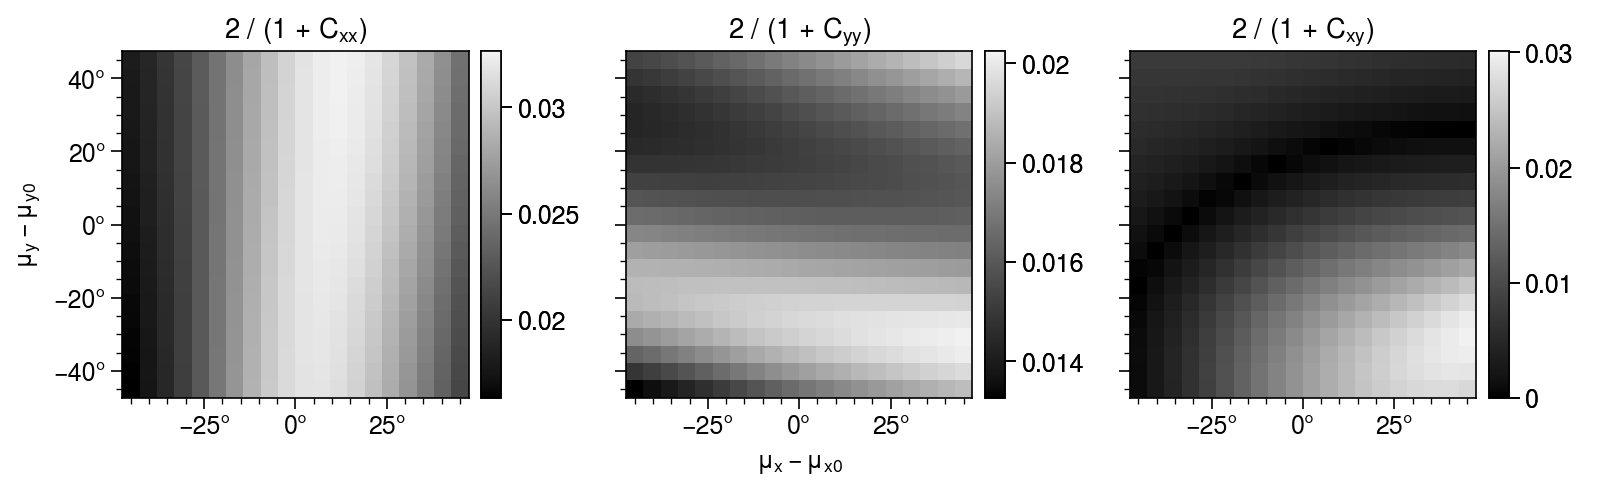

In [232]:
datas = [
    2.0 / (1.0 + condition_numbers_xx),
    2.0 / (1.0 + condition_numbers_yy),
    2.0 / (1.0 + condition_numbers_xy),
#     np.log10(condition_numbers_xx),
#     np.log10(condition_numbers_yy),
#     np.log10(condition_numbers_xy),
]
cbar_labels = [
    r'2 / (1 + $C_{xx}$)', 
    r'2 / (1 + $C_{yy}$)',
    r'2 / (1 + $C_{xy}$)',
#     r'$\log_{10} (C_{xx})$',
#     r'$\log_{10} (C_{yy})$',
#     r'$\log_{10} (C_{xy})$',
]
fig, axes = pplt.subplots(ncols=3, figwidth=8.0, space=5.0)
for ax, data, label in zip(axes, datas, cbar_labels):
    vmin = None
    if ax is axes[2]:
        vmin = 0.0
    m = ax.pcolormesh(phase_devs_x, phase_devs_y, data.T, ec='None', vmin=vmin, 
                      cmap=pplt.Colormap('mono_r', right=0.95))
    ax.colorbar(m, width=0.1)
    ax.set_title(label)
axes.format(xlabel=r'$\mu_x - \mu_{x0}$', ylabel=r'$\mu_y - \mu_{y0}$',
            xformatter='deg', yformatter='deg')
plt.savefig('_output/figures/inverse_condition_numbers.png', dpi=400)
plt.show()

In [73]:
pos = np.array([(mux, muy) for muy in phase_devs_y for mux in phase_devs_x])
errs = [eps_x_errs, eps_y_errs, eps_1_errs, eps_2_errs]
stds = [eps_x_stds, eps_y_stds, eps_1_stds, eps_2_stds]
frac_errs = [
    eps_x_errs / eps_x_true, 
    eps_y_errs / eps_y_true, 
    eps_1_errs / eps_1_true, 
    eps_2_errs / eps_2_true
]
frac_stds = [
    eps_x_stds / eps_x_true,
    eps_y_stds / eps_y_true,
    eps_1_stds / eps_1_true, 
    eps_2_stds / eps_2_true,
]
vmax = np.nanmax(frac_errs)
vmin = np.nanmin(frac_errs)
vmax = max(abs(vmax), abs(vmin))
vmin = -vmax

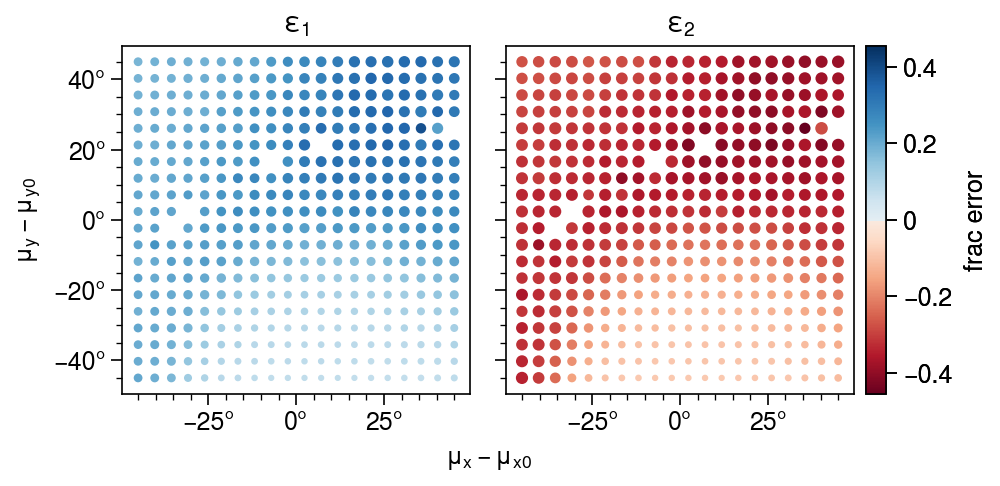

In [76]:
fig, axes = pplt.subplots(nrows=1, ncols=2, figwidth=5.0)
for ax, err, std in zip(axes, frac_errs[2:], stds[2:]):
    c = err.T.flatten()
    s = std.T.flatten() * 3.0
    s = np.clip(s, 1.0, None)
    m = ax.scatter(
        pos[:, 0], pos[:, 1], s=s, c=c, 
        cmap=pplt.Colormap('RdBu', cut=0.1), 
        diverging=True,
        vmin=vmin, vmax=vmax
    )
fig.colorbar(m, ax=axes[1], label='frac error', width=0.1)
axes.format(xlabel=r'$\mu_x - \mu_{x0}$', ylabel=r'$\mu_y - \mu_{y0}$',
            xformatter='deg', yformatter='deg')
for ax, label in zip(axes, [r'$\varepsilon_1$', r'$\varepsilon_2$']):
    ax.set_title(label)
plt.show()

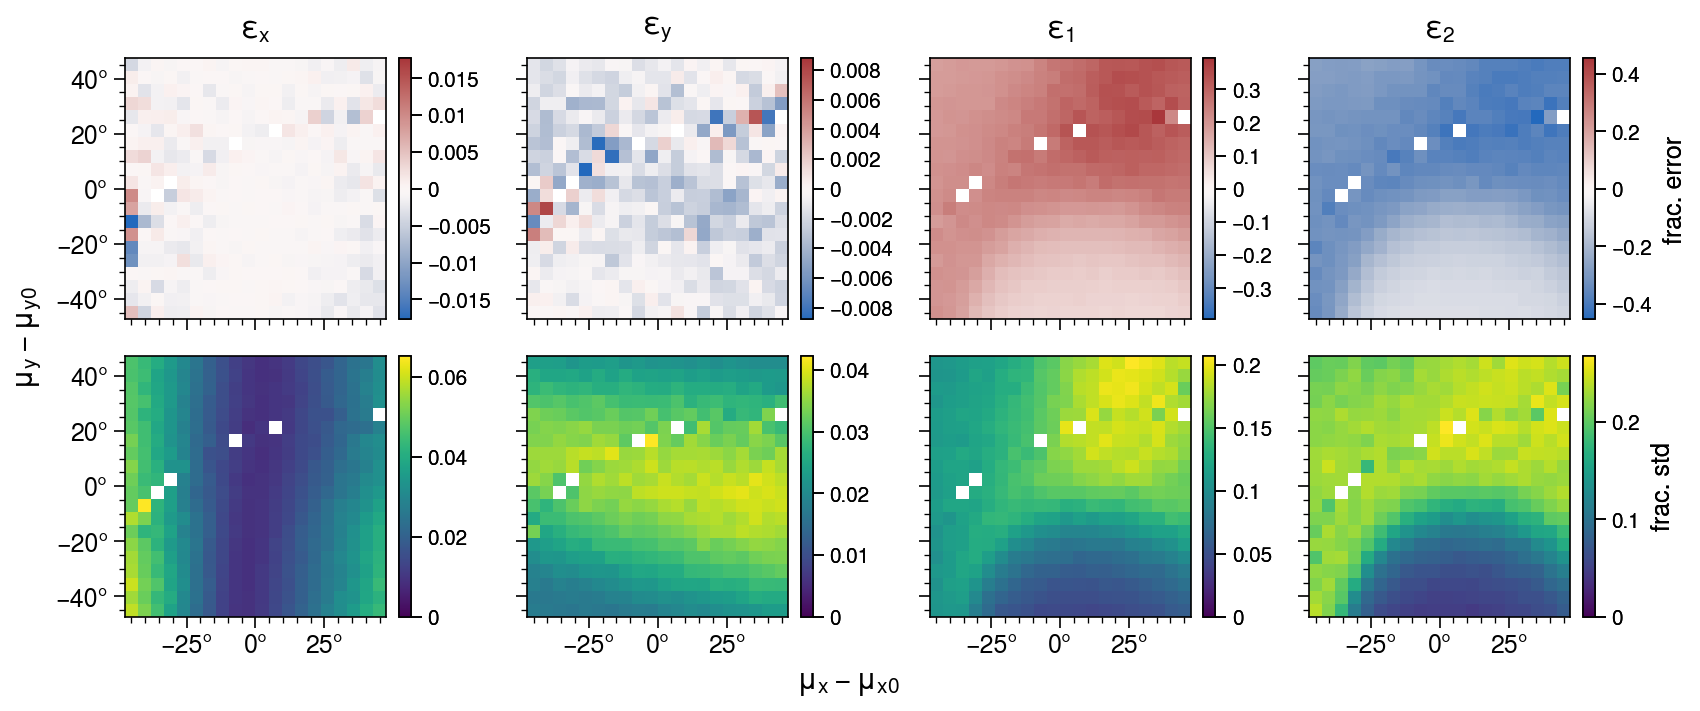

In [233]:
colorbar_kws = dict(width=0.06, ticklabelsize='small')
eps_labels = [r'$\varepsilon_x$', r'$\varepsilon_y$',
              r'$\varepsilon_1$', r'$\varepsilon_2$']

fig, axes = pplt.subplots(ncols=4, nrows=2, figwidth=8.5, space=None)
for ax, err in zip(axes[0, :], frac_errs):
    vmax_ = max(abs(np.nanmax(err)), abs(np.nanmin(err)))
    m = ax.pcolormesh(phase_devs_x, phase_devs_y, err.T,
                      cmap='Vlag', diverging=True, 
                      vmax=vmax_, vmin=-vmax_,
                      ec='None',)
    ax.colorbar(m, label='frac. error' if ax is axes[0, -1] else '', **colorbar_kws)
# fig.colorbar(m, ax=axes[0, -1], label='frac. error', **colorbar_kws)
for ax, std in zip(axes[1, :], frac_stds):
    vmax_ = max(abs(np.nanmax(std)), abs(np.nanmin(std)))
    m = ax.pcolormesh(phase_devs_x, phase_devs_y, std.T, 
                      vmin=0.0, vmax=vmax_,
                      ec='None',)
    ax.colorbar(m, label='frac. std' if ax is axes[1, -1] else '', **colorbar_kws)
# fig.colorbar(m, ax=axes[1, -1], label='frac. std', **colorbar_kws)
axes.format(xlabel=r'$\mu_x - \mu_{x0}$', ylabel=r'$\mu_y - \mu_{y0}$',
            xformatter='deg', yformatter='deg',
            toplabels=eps_labels, 
            toplabels_kw=dict(fontweight='normal', fontsize='large'),
            xlabel_kw=dict(fontsize='large'), ylabel_kw=dict(fontsize='large')

           )
plt.savefig('_output/figures/montecarlo_emittances.png', dpi=500)
plt.show()

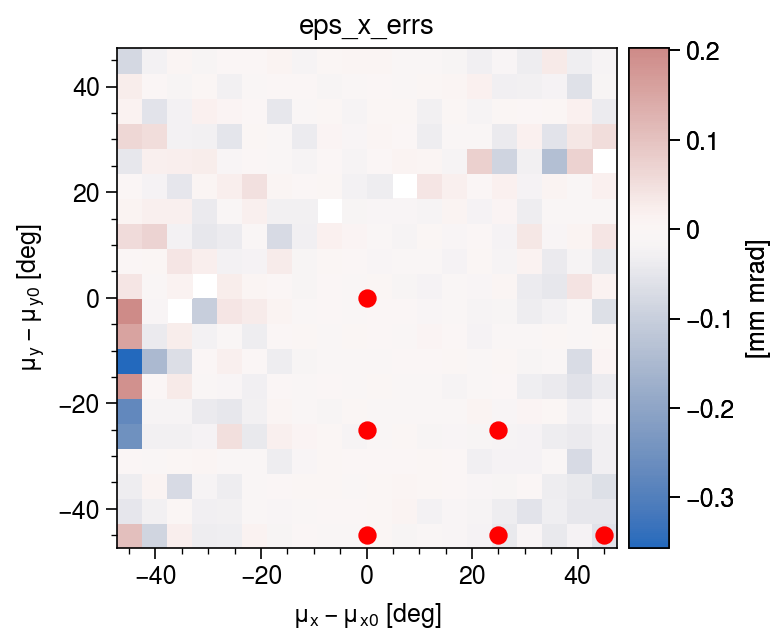

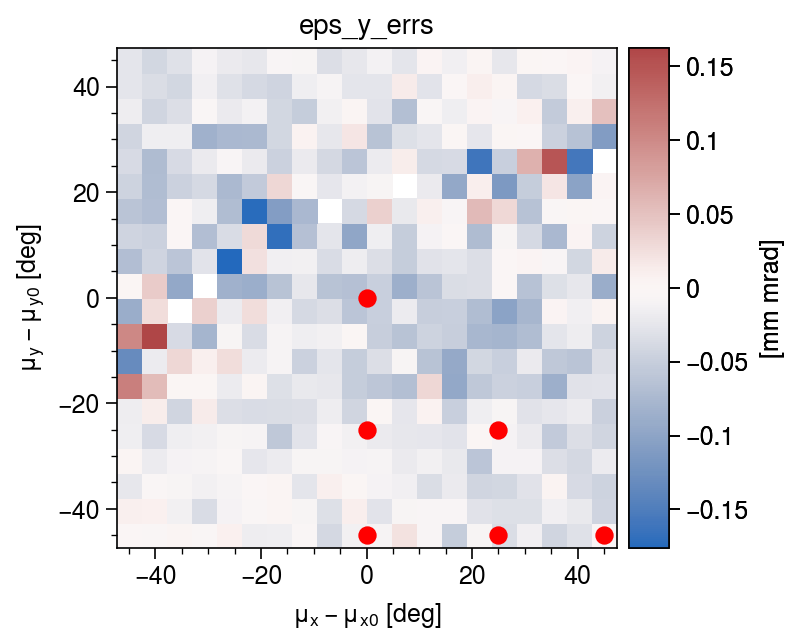

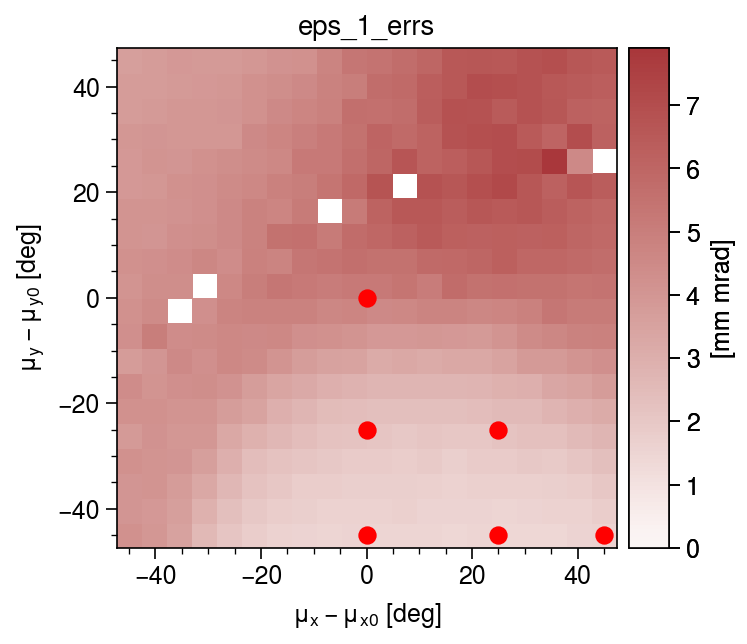

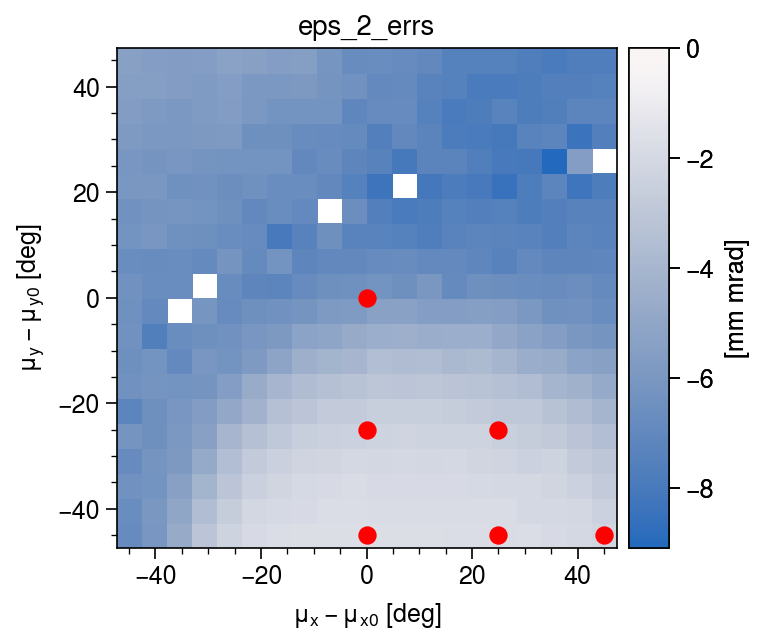

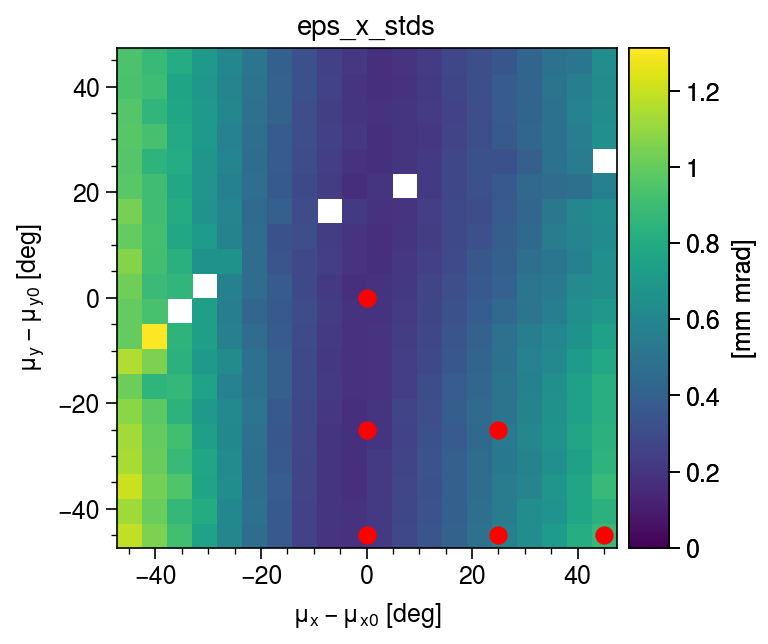

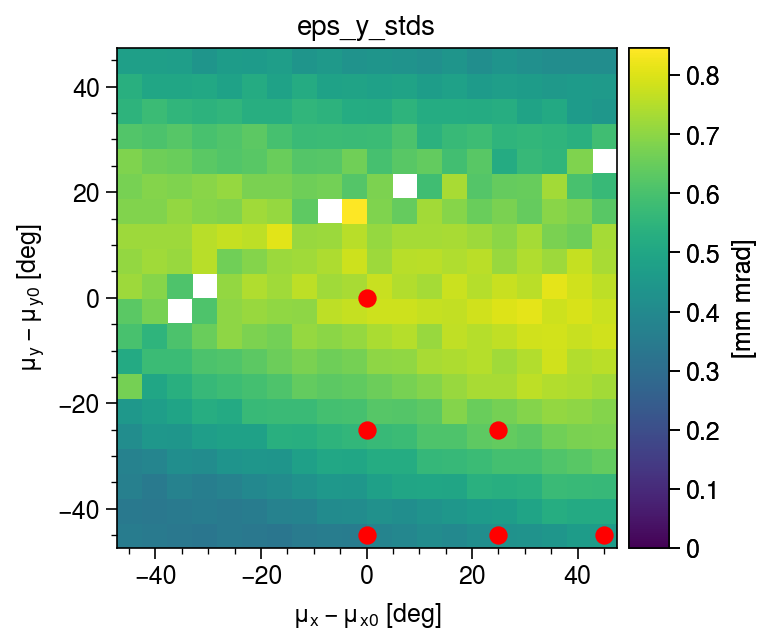

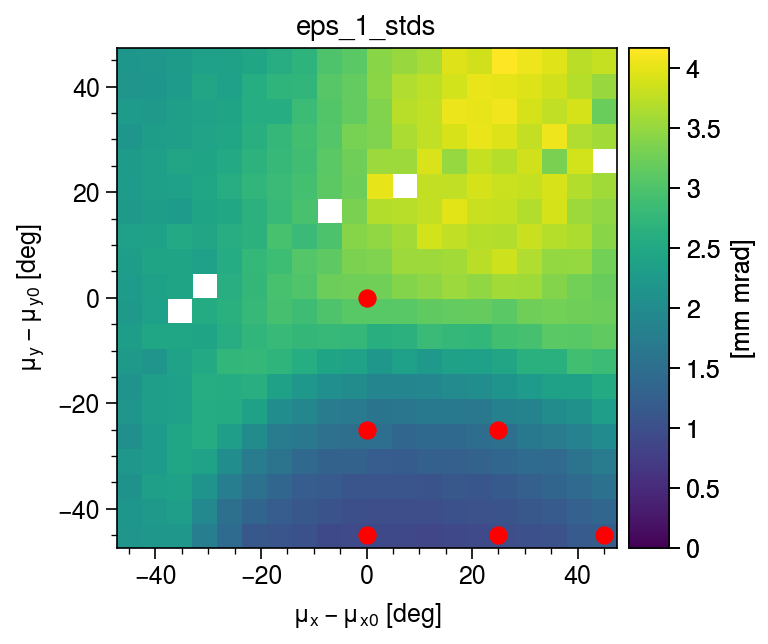

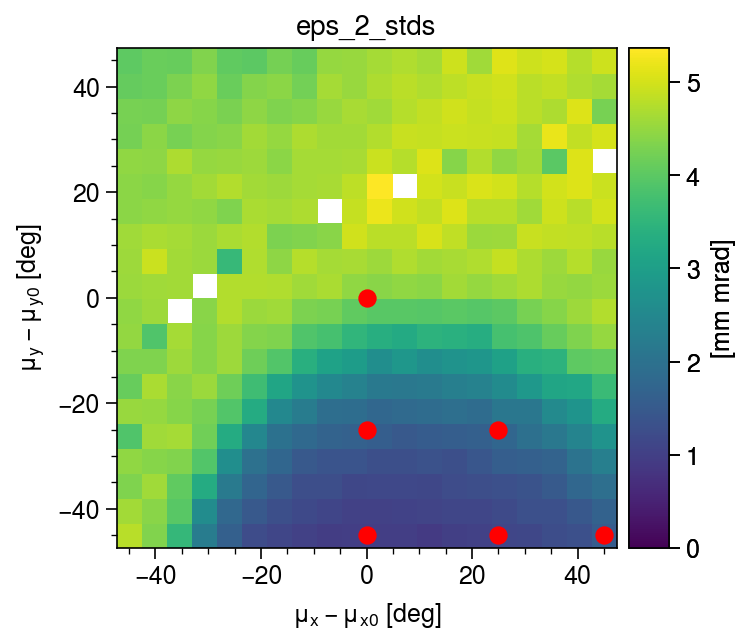

In [51]:
titles = ['eps_x_errs', 'eps_y_errs', 'eps_1_errs', 'eps_2_errs', 
          'eps_x_stds', 'eps_y_stds', 'eps_1_stds', 'eps_2_stds']
datas = [eps_x_errs, eps_y_errs, eps_1_errs, eps_2_errs,
         eps_x_stds, eps_y_stds, eps_1_stds, eps_2_stds]

for data in datas:
    data[data == 0.0] = None

for title, data in zip(titles, datas):
    fig, ax = pplt.subplots()
    ax.pcolormesh(phase_devs_x, phase_devs_y, data.T, 
                  vmin=0.0 if 'std' in title else None,
                  diverging='std' not in title,
                  cmap=None if 'std' in title else 'Vlag',
                  colorbar=True, colorbar_kw=dict(label='[mm mrad]'))
    for (dmux, dmuy) in dmus:
        ax.scatter(dmux, dmuy, color='red')
    ax.format(xlabel=r'$\mu_x - \mu_{x0}$ [deg]', ylabel=r'$\mu_y - \mu_{y0}$ [deg]', title=title, 
             )
    plt.show()